In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train1 = x_train / 255
x_test1 = x_test / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train1.reshape((x_train.shape[0], 28*28))
x_test = x_test1.reshape((x_test.shape[0], 28*28))

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Autoencoder 구축

In [23]:
input_size = 784
hidden_size = 128
code_size = 64 # 인코더가 출력하는 저차원 벡터의 차원

# Encoder 부분 생성
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)

# Decoder 부분 생성
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)


In [24]:
from tensorflow.keras.optimizers import Adam
autoencoder.compile(optimizer=Adam(0.001), loss="binary_crossentropy")
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1764
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1069
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0954
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0899
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0866
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0842
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0823
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0810
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0800
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0793


In [26]:
decoded_imgs = autoencoder.predict(x_test)

In [27]:
decoded_imgs = decoded_imgs.reshape((10000,28,28))

In [28]:
decoded_imgs.shape

(10000, 28, 28)

## 원래 이미지와 복원된 이미지 비교

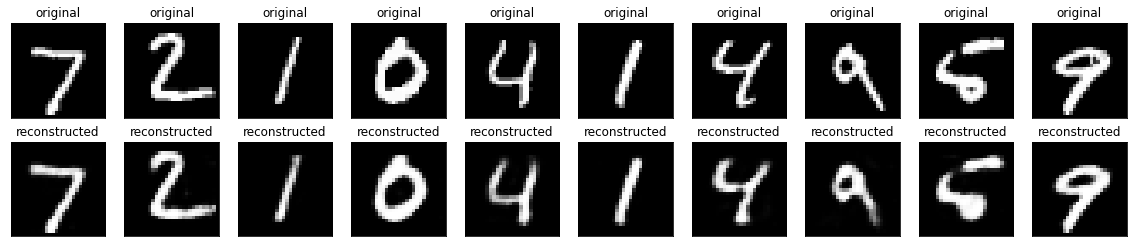

In [30]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test1[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 저차원 벡터 (representation vector)를 이용한 분류

In [31]:
# 전체 모형에서 인코더 부분만 사용한 새로운 모형 생성
encoder = Model(inputs=input_img, outputs=code)

In [32]:
# encode the train data
X_train_encode = encoder.predict(x_train)
# encode the test data
X_test_encode = encoder.predict(x_test)

In [33]:
X_train_encode.shape

(60000, 64)

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [36]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape=(X_train_encode.shape[1],)))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [40]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.Adam(0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [41]:
history = model.fit(X_train_encode, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.7939 - accuracy: 0.7670 - val_loss: 0.3431 - val_accuracy: 0.9004
Epoch 2/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3353 - accuracy: 0.9021 - val_loss: 0.2915 - val_accuracy: 0.9124
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.9140 - val_loss: 0.2546 - val_accuracy: 0.9251
Epoch 4/20
375/375 [==============================] - 1s 1ms/step - loss: 0.2501 - accuracy: 0.9265 - val_loss: 0.2257 - val_accuracy: 0.9340
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2252 - accuracy: 0.9343 - val_loss: 0.2081 - val_accuracy: 0.9390
Epoch 6/20
375/375 [==============================] - 1s 1ms/step - loss: 0.2032 - accuracy: 0.9400 - val_loss: 0.1883 - val_accuracy: 0.9454
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1881 - accuracy: 0.9450 - val_loss: 0.1860 - val_accuracy: 0.9459
Epoch 

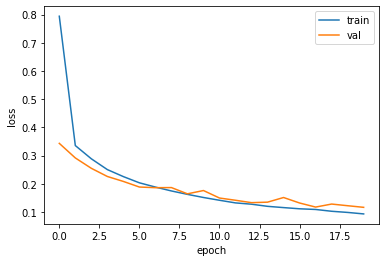

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [43]:
model.evaluate(X_test_encode, y_test_one_hot)

313/313 [==============================] - 0s 809us/step - loss: 0.1114 - accuracy: 0.9658


[0.11141929775476456, 0.9657999873161316]